# Métodos de Monte Carlo

## Calculando $\pi$


El término "método de Monte Carlo" se aplica en general a cualquier método numérico que emplea números aleatorios. Las caminatas aleatorias se pueden ver como un tipo de método de Monte Carlo.

Julia ya tiene una variable asociada al valor de pi que nos sirve para hacer cuentas.

** ¿Qué tipo de variable es? **

In [1]:
pi

π = 3.1415926535897...

In [2]:
π

π = 3.1415926535897...

In [3]:
typeof(pi)

Irrational{:π}

In [4]:
typeof(π)

Irrational{:π}

In [5]:
pi*2

6.283185307179586

In [6]:
π^2

9.869604401089358

Vamos a calcular pi con N pares de números aleatorios dentro de una caja.

* Area de un cuadrado de lado $l$, $l^2$.

* Área de un círculo es: $\pi R^2$.

### Dibujemos un círculo de radio $R=1$ 


In [7]:
using Plots
pyplot()

Plots.PyPlotBackend()

La ecuación para un círculo de de radio R, centrado en C=(a,b) es

$$(x-a)^2+(y-b)^2=R^2$$

Si $R=1$ y $(a,b)=(1,1)$

$$y(x)=(1-(x-0.5)^2)^{1/2}+0.5$$

In [37]:
y_circulo(x) =1.+(1.-(x.-1).^2).^0.5

y_circulo (generic function with 1 method)

In [38]:
y_circulo_inf(x) =1.-(1.-(x.-1).^2).^0.5

y_circulo_inf (generic function with 1 method)

In [39]:
x=collect(0:0.05:2)

41-element Array{Float64,1}:
 0.0 
 0.05
 0.1 
 0.15
 0.2 
 0.25
 0.3 
 0.35
 0.4 
 0.45
 0.5 
 0.55
 0.6 
 ⋮   
 1.45
 1.5 
 1.55
 1.6 
 1.65
 1.7 
 1.75
 1.8 
 1.85
 1.9 
 1.95
 2.0 

In [15]:
y_circulo(x)

16-element Array{Float64,1}:
 1.36603
 1.41652
 1.45394
 1.4798 
 1.49499
 1.5    
 1.49499
 1.4798 
 1.45394
 1.41652
 1.36603
 1.3    
 1.21414
 1.1    
 0.93589
 0.5    


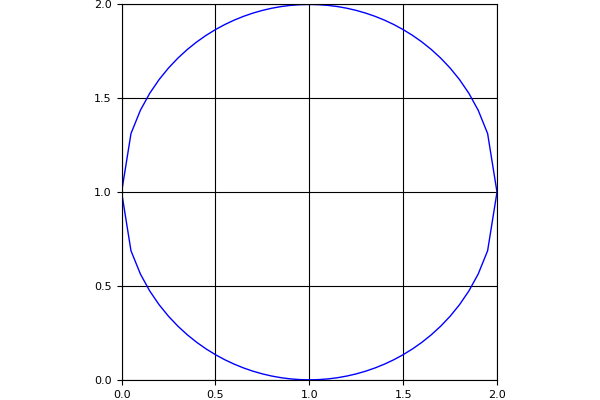

In [46]:
plot(x,y_circulo(x),color="blue",aspectratio=1,legend=false)
plot!(x,y_circulo_inf(x),color="blue",legend=false)

El cuadrado de lado dos con vértices (0,0), (0,2), (2,0), (2,2) es el que nos va a interesar.

Si generamos números completamente aleatorios estos se distribuiran de manera uniforme dentro del cuadrado.




In [47]:
# Una manera fea de generar una lista aleatoria
N=100
x_rand=[]
for i in 1:N
    push!(x_rand,rand()*2)
end
x_rand

100-element Array{Any,1}:
 0.951064 
 0.442805 
 0.843383 
 0.618914 
 0.391584 
 0.293672 
 0.0719406
 1.56528  
 0.0826705
 0.262319 
 1.56726  
 1.25492  
 0.925847 
 ⋮        
 1.00901  
 1.83637  
 0.473362 
 0.523024 
 1.69491  
 1.89308  
 1.26464  
 1.92924  
 1.10515  
 1.33886  
 0.558014 
 0.30896  

### List comprenhension

In [50]:
# Una forma más práctica
N=10000
y_rand = [rand()*2 for i in 1:N]
x_rand = [rand()*2 for i in 1:N]

10000-element Array{Float64,1}:
 1.59404  
 0.219987 
 0.974694 
 0.938666 
 0.26223  
 1.91804  
 0.131076 
 0.67151  
 0.131866 
 1.77249  
 1.19404  
 0.24947  
 0.590286 
 ⋮        
 0.0856889
 0.364673 
 0.758149 
 1.71331  
 1.32125  
 1.6309   
 0.593988 
 0.0169643
 0.354326 
 1.68368  
 1.87638  
 0.198109 


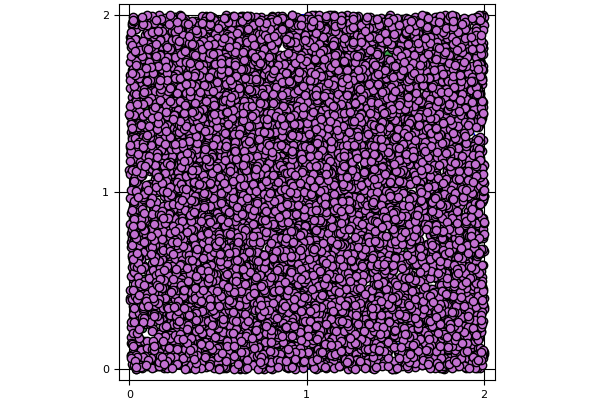

In [51]:
scatter!(x_rand,y_rand)


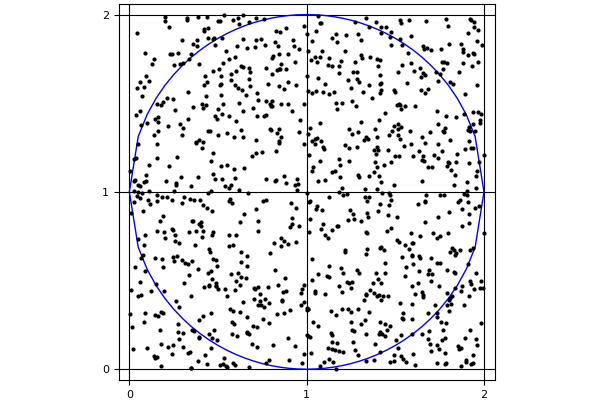

In [80]:
#Generando nuestra area de trabajo
plot(x,y_circulo(x),color="blue",aspectratio=1,legend=false)
plot!(x,y_circulo_inf(x),color="blue",legend=false)

# Generando pares aleatorios
N=1000
y_rand = [rand()*2 for i in 1:N]
x_rand = [rand()*2 for i in 1:N]

#Graficar numeros aleatorios
scatter!(x_rand,y_rand,color="black",ms=2)

Soi contamos los puntos están dentro del círculo $N_{dentro}$ podemos encontrar un valor aproximado de $\pi$ al notar que:

$$\frac{N_{dentro}}{N} = \frac{A_{circ}}{A_{cuadrado}} = \frac{\pi R^2}{l^2 }$$

Despejando $\pi$:

$$\pi=\frac{l^2}{R^2} \frac{N_{dentro}}{N}$$

**¿Cómo sabemos si están dentro del círculo?**

In [3]:
function dentro_fuera(x,y,x_cc,y_cc,R)
    # Los argumentos: x,y son listas de números aleatorios
    #                 x_cc,y_cc es el centro del círculo
    #                 R es el radio del círculo
    x_dentro = []
    y_dentro = []
    
    x_fuera, y_fuera = [], []
        
    # Si están dentro del círculo agrega los puntos 
    # a x_dentro y y_dentro
    for i in 1:length(x)
        if distancia(x[i],y[i],x_cc,y_cc) <= 1
            push!(x_dentro,x[i])
            push!(y_dentro,y[i])
        # Si no agrega los puntos a x_fuera, y_fuera
        else
            push!(x_fuera,x[i])
            push!(y_fuera,y[i])
        end
            
    end
    return x_dentro, y_dentro, x_fuera, y_fuera
end


function distancia(x,y,x0,y0)
    """ 
    
    Esta función calcula la distancia Euclidiana entre los puntos (x0,y0) y (x,y)
    """
    return ((x-x0)^2+(y-y0)^2)^0.5 
end

dentro_fuera (generic function with 1 method)

In [2]:
?distancia

search: distancia



No documentation found.

`distancia` is a generic `Function`.

```julia
# 1 method for generic function "distancia":
distancia(x, y, x0, y0) at In[1]:2
```


Probamos si nuestra función hace lo que necesitamos

In [81]:
x_d,y_d,x_f,y_f=dentro_fuera(x_rand,y_rand,1,1,1)

(Any[0.6319823004697902,0.3069042218233111,0.9998337928850236,1.0758423885248138,0.5975734668853807,0.3309497400983892,1.6551111472920312,1.7930065274875755,0.6000420282018322,1.9166588368864108  …  0.7175765411208443,1.0068151354103718,0.31430046831267555,0.29785822384096683,1.5299589314504902,1.244778501137465,1.1375548403375078,0.8422066746103964,0.5162041603310525,1.3502727839010737],Any[1.351150911326894,0.9711449007053257,0.3473493979630953,1.7596370269773218,0.44721038310071703,1.4122064532075553,1.2025424354768028,1.1432184340076028,1.6828001301201208,0.8745357913828467  …  1.4262609834269924,0.33901711441479376,0.6004007854785565,1.3200746817311102,1.469301784205812,0.8997785641920979,0.3282182729076588,1.2758524769446575,1.147839740583048,1.601686901716194],Any[1.5319748517844607,0.08787376968486393,0.08024283951814626,0.19973275350987496,0.2765697712944717,1.952692684481712,0.43706500028714323,1.7010805971212815,0.5827660357016775,0.2232401413554146  …  1.542771755342467,0.1


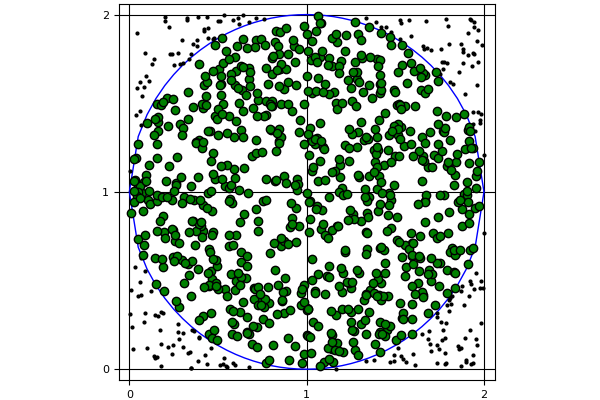

In [82]:
scatter!(x_d,y_d,color="green")


In [91]:
length(x_d)+length(x_f)

1000

In [ ]:
4*length(x_d)/N ####  $R^2 N_{dentro}/N_{total}$

In [ ]:
N=1e6 ### Si calculamos números más grandes se me acaba la memoria
y_rand = [rand()*2 for i in 1:N]
x_rand = [rand()*2 for i in 1:N]
x_d,y_d =dentro_fuera(x_rand,y_rand,1,1,1)
println("El valor de pi para N pruebas es " ,4*length(x_d)/N)

In [97]:
println("El valor de pi para $N pruebas es " ,4*length(x_d)/N)

El valor de pi para 1.0e6 pruebas es 3.143184


## Problemas con la memoria

¿Cuántos números pueden lanzar y analizar antes de quedarse sin memoria? (# bites por entrada * N)

**¿Cómo mejoraría el rendimiento?** 
* Olvídense de graficar $\rightarrow$ No necesitamos tantos arreglos.

**Calculen $\pi$ con un error, al comparar con el pi de julia, de menos del 0.01%
